In [1]:
import pandas as pd

In [2]:
import random

In [3]:
L = []
for i in range(10000):
  a = random.randint(1,6)
  b = random.randint(1,6)

  L.append(a + b)

In [4]:
len(L)

10000

In [5]:
L[:5]

[10, 9, 7, 7, 5]

In [6]:
s = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()

In [7]:
import numpy as np
np.cumsum(s)

2     0.0297
3     0.0868
4     0.1693
5     0.2776
6     0.4148
7     0.5809
8     0.7191
9     0.8346
10    0.9213
11    0.9731
12    1.0000
Name: count, dtype: float64

<Axes: >

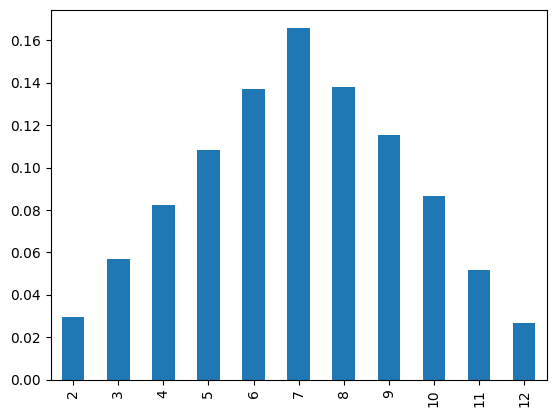

In [8]:
s.plot(kind='bar')

<Axes: >

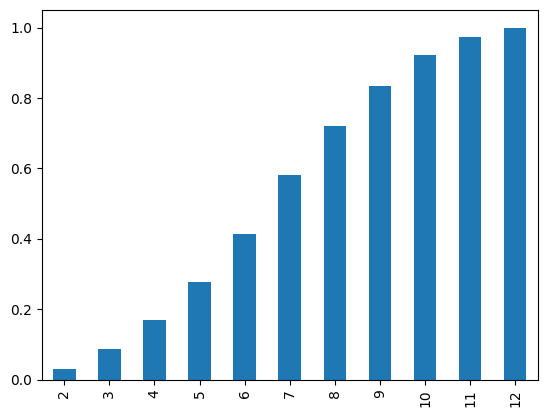

In [9]:
np.cumsum(s).plot(kind='bar')

# Parametric Density Estimation

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample = normal(loc=50, scale=5,size=1000)

In [11]:
sample.mean()

49.82825680342943

(array([  3.,  15.,  47., 125., 217., 207., 191., 120.,  63.,  12.]),
 array([33.53841619, 36.50283307, 39.46724995, 42.43166683, 45.39608371,
        48.36050059, 51.32491747, 54.28933435, 57.25375123, 60.21816811,
        63.18258499]),
 <BarContainer object of 10 artists>)

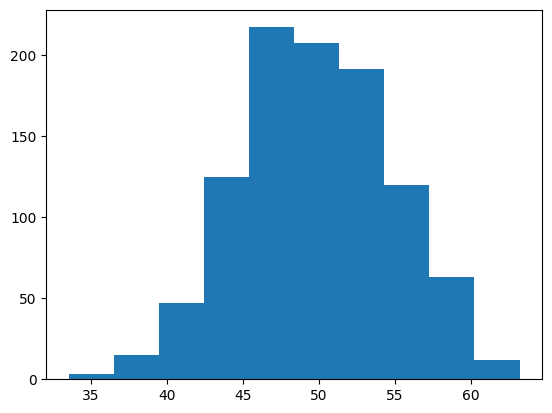

In [12]:
# plot histogram to understand the distribution of data
plt.hist(sample,bins=10)

In [13]:
# calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()

In [14]:
# fit the distribution with the above parameters

from scipy.stats import norm
dist = norm(60, 12)

In [15]:
values = np.linspace(sample.min(),sample.max(),100)

In [16]:
sample.max()

63.18258499140768

In [17]:
probabilities = [dist.pdf(value) for value in values]

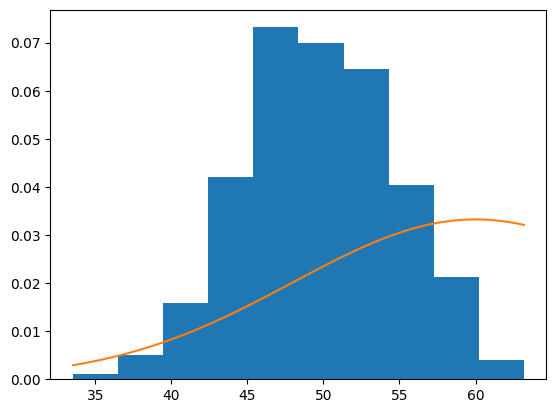

In [18]:
# plot the histogram and pdf
plt.hist(sample,bins=10,density=True)
plt.plot(values,probabilities)

C:\Users\abdul\AppData\Local\Temp\ipykernel_21880\1482356190.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)


<Axes: ylabel='Density'>

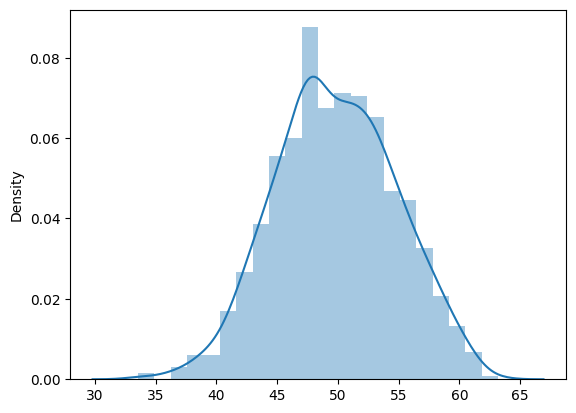

In [19]:
import seaborn as sns
sns.distplot(sample)

# KDE

In [20]:
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

In [21]:
sample

array([20.32416095, 17.54279796, 20.93757471, 17.61948368, 20.03807994,
       22.40909857, 23.15887955, 12.3908942 , 16.20281508, 30.91086245,
       16.50267773, 16.946353  , 27.22983161, 13.86314702, 21.7904046 ,
       16.89728889, 15.67165305, 18.41456465,  8.69903246, 27.11766907,
       17.36413059, 20.54406059, 16.39876232, 15.92836281, 17.88201435,
       23.01320807, 22.27059398, 22.73989161, 19.2579621 , 18.09661826,
       16.99291338, 13.05190446, 14.14693853, 21.61495444, 16.17920082,
       17.56399753, 17.50512167, 19.79428874, 25.76159268, 19.91462549,
       20.76767287, 27.0629922 , 20.32303514, 20.46117921, 15.9010297 ,
       26.9121038 , 19.66773201, 15.06466843, 22.18458581, 10.96467574,
       15.9779125 , 16.69817283, 17.12884945, 28.14806885,  2.03305286,
       18.17171732, 23.68762556, 26.28500795, 28.00116728, 18.45028896,
       23.08624325, 21.28752222, 12.84849753, 21.97206495, 13.09046526,
       17.79529846, 23.9113896 , 16.29095952, 23.52521009, 18.85

(array([ 1.,  0.,  0.,  1.,  0.,  2.,  5.,  1.,  2.,  5.,  7., 10., 24.,
        24., 23., 24., 21., 33., 22., 25., 16.,  6., 15., 12., 12., 14.,
        14., 13., 22., 26., 29., 32., 41., 47., 45., 61., 71., 52., 57.,
        49., 40., 42., 16., 11., 10.,  9.,  2.,  2.,  1.,  3.]),
 array([ 2.03305286,  3.08240983,  4.13176681,  5.18112378,  6.23048076,
         7.27983773,  8.32919471,  9.37855168, 10.42790866, 11.47726563,
        12.52662261, 13.57597958, 14.62533656, 15.67469353, 16.72405051,
        17.77340748, 18.82276446, 19.87212143, 20.92147841, 21.97083538,
        23.02019236, 24.06954933, 25.11890631, 26.16826329, 27.21762026,
        28.26697724, 29.31633421, 30.36569119, 31.41504816, 32.46440514,
        33.51376211, 34.56311909, 35.61247606, 36.66183304, 37.71119001,
        38.76054699, 39.80990396, 40.85926094, 41.90861791, 42.95797489,
        44.00733186, 45.05668884, 46.10604581, 47.15540279, 48.20475976,
        49.25411674, 50.30347372, 51.35283069, 52.40218767,

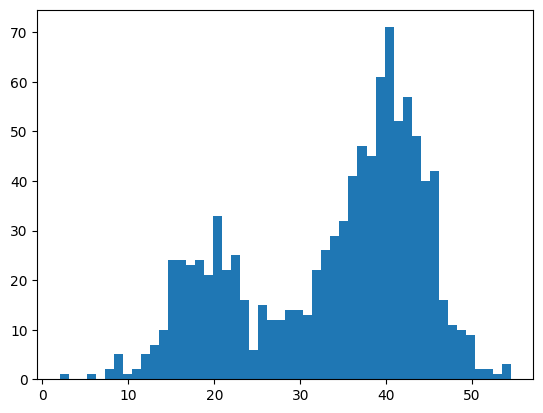

In [22]:
# plot histogram bins=50
plt.hist(sample,bins=50)

In [23]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=5, kernel='gaussian')

# convert data to a 2D array
sample = sample.reshape((len(sample), 1))

model.fit(sample)

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values), 1))

In [ ]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

`score_samples(values)` returns the log-density estimate of the input samples values. This is because the `score_samples()` method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate.

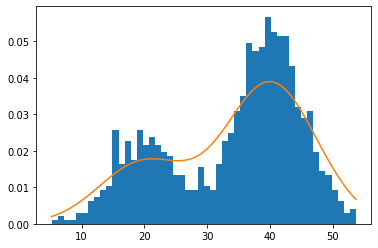

In [ ]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)
plt.show()

<AxesSubplot:ylabel='Density'>

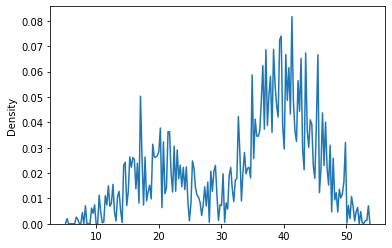

In [ ]:
sns.kdeplot(sample.reshape(1000),bw_adjust=0.02)

In [ ]:
import seaborn as sns

In [ ]:
df = sns.load_dataset('iris')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Density'>

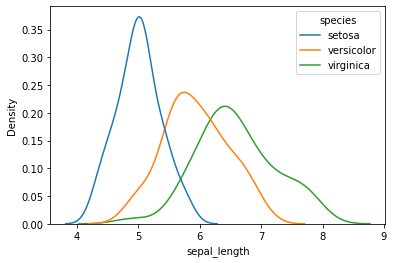

In [ ]:
sns.kdeplot(data=df,x='sepal_length',hue='species')

<Axes: xlabel='sepal_width', ylabel='Density'>

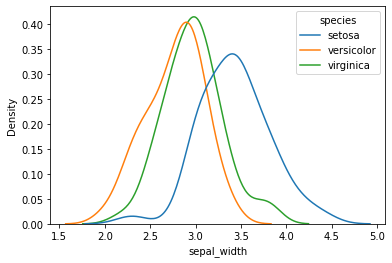

In [ ]:
sns.kdeplot(data=df,x='sepal_width',hue='species')

<Axes: xlabel='petal_length', ylabel='Density'>

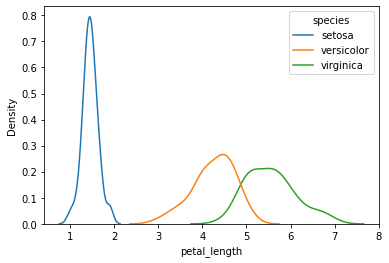

In [ ]:
sns.kdeplot(data=df,x='petal_length',hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

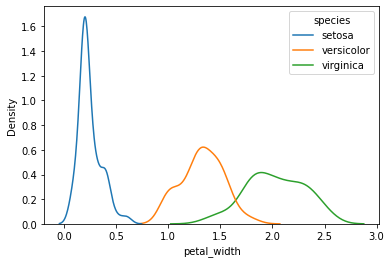

In [ ]:
sns.kdeplot(data=df,x='petal_width',hue='species')

<AxesSubplot:xlabel='petal_width', ylabel='Density'>

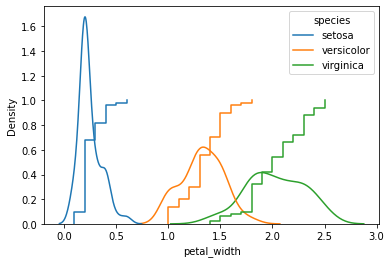

In [ ]:
sns.kdeplot(df['petal_width'],hue=df['species'])
sns.ecdfplot(data=df,x='petal_width',hue='species')

In [ ]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age', ylabel='Density'>

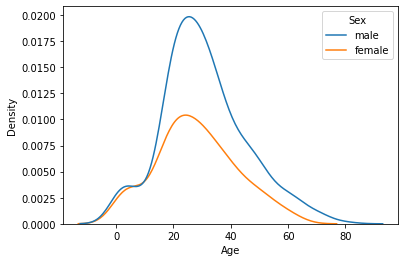

In [ ]:
# code here
sns.kdeplot(data=titanic,x='Age',hue='Sex')

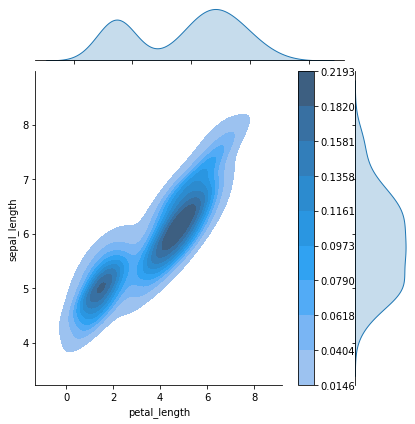

In [ ]:
 sns.jointplot(data=df, x="petal_length", y="sepal_length", kind="kde",fill=True,cbar=True)

<Axes: xlabel='Age', ylabel='Density'>

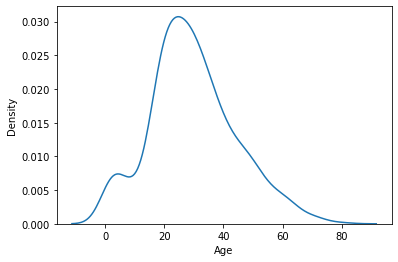

In [ ]:
sns.kdeplot(titanic['Age'])

In [ ]:
titanic['Age'].mean()

29.69911764705882

In [ ]:
x = (titanic['Age'] - titanic['Age'].mean())/titanic['Age'].std()

<Axes: xlabel='Age', ylabel='Density'>

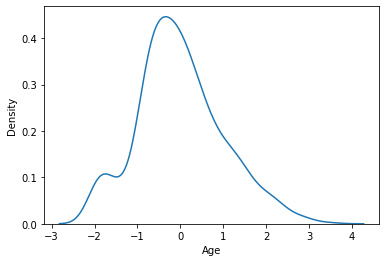

In [ ]:
sns.kdeplot(x)

In [ ]:
x.mean()

2.338621049070358e-16

In [ ]:
x.std()

1.0

In [ ]:
titanic['Age'].skew()

0.38910778230082704

In [ ]:
titanic['Age'].mean() + 3*titanic['Age'].std()

73.27860964406094

In [ ]:
titanic['Age'].mean() - 3*titanic['Age'].std()

-13.880374349943303

In [ ]:
titanic[titanic['Age'] > 73]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S


In [ ]:
titanic['Age'].max()

80.0